In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import matplotlib.cm as cm
import matplotlib.colors as mcolors 

from scipy.io import loadmat
import h5py

import time

In [2]:
import mpi4py
import mpi
import sys
import os

In [3]:
#pip install --no-cache-dir --verbose dedalus


In [4]:
pip install numpy==1.26.1


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade cython setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [14]:
#pip install dedalus

In [7]:
#pip install the_well

In [8]:
#!the-well-download --base-path "C:/Users/Matteo/Documents/Speciale/Data" --dataset planetswe --split train


In [9]:
# Function to recursively load datasets into variables
def load_hdf5_datasets(group, variable_dict, current_path=""):
    """
    Recursively load datasets into a dictionary for use as variables.

    Args:
        group (h5py.Group): The current group to explore.
        variable_dict (dict): Dictionary to store datasets.
        current_path (str): The current path in the HDF5 hierarchy.
    """
    for key in group.keys():
        item = group[key]
        item_path = f"{current_path}/{key}" if current_path else key
        variable_name = item_path.replace("/", "_")  # Convert path to a variable-friendly name
        if isinstance(item, h5py.Dataset):
            variable_dict[variable_name] = item[...]
        elif isinstance(item, h5py.Group):
            load_hdf5_datasets(item, variable_dict, item_path)

# Path to your HDF5 file
file_path = r'C:\Users\Matteo\Documents\Speciale\Data\datasets\planetswe\data\train\planetswe_IC03_s1.hdf5'

# Dictionary to store datasets as variables
variables = {}

# Open the HDF5 file and load datasets
with h5py.File(file_path, "r") as hdf:
    load_hdf5_datasets(hdf, variables)

# Print the loaded variables
print(f"Total variables created: {len(variables)}")
for var_name, data in variables.items():
    print(f"Variable: {var_name}, Shape: {data.shape}, Data type: {data.dtype}")

# Example of accessing one of the variables
example_var = variables.get("t0_fields_field_1", None)
if example_var is not None:
    print(f"Data from t0_fields_field_1: {example_var}")


Total variables created: 7
Variable: boundary_conditions_phi_periodic_mask, Shape: (512,), Data type: bool
Variable: boundary_conditions_theta_open_mask, Shape: (256,), Data type: bool
Variable: dimensions_phi, Shape: (512,), Data type: float32
Variable: dimensions_theta, Shape: (256,), Data type: float32
Variable: dimensions_time, Shape: (1008,), Data type: float32
Variable: t0_fields_height, Shape: (1, 1008, 256, 512), Data type: float32
Variable: t1_fields_velocity, Shape: (1, 1008, 256, 512, 2), Data type: float32


In [10]:
water_height = variables.get("t0_fields_height", None)
theta = variables.get("dimensions_theta", None)
phi = variables.get("dimensions_phi", None)

n = 100
theta.shape, phi.shape, water_height.shape

water_height = water_height[0, :n, :, :]
water_norm = (water_height - np.min(water_height)) / (np.max(water_height) - np.min(water_height))
water_norm.shape

(100, 256, 512)

In [11]:
r = 1
THETA, PHI = np.meshgrid(phi, theta)

# Convert to Cartesian coordinates
X = r * np.sin(PHI) * np.cos(THETA)
Y = r * np.sin(PHI) * np.sin(THETA)
Z = r * np.cos(PHI)

TypeError: Invalid shape (512,) for image data

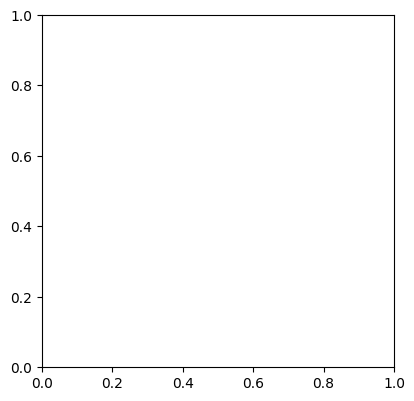

In [12]:
cmap = 'Blues_r'

# Plot initial water height
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(water_norm[0, 100], cmap=cmap)
plt.colorbar()
plt.title("Initial water height")
plt.xlabel("Theta")
plt.ylabel("Phi")

plt.subplot(1, 2, 2)
plt.imshow(water_norm[0, 500], cmap=cmap)
plt.colorbar()
plt.title("Initial water height")
plt.xlabel("Theta")
plt.ylabel("Phi")
plt.show()


Text(0.5, 0.92, 'Water height at time step 0')

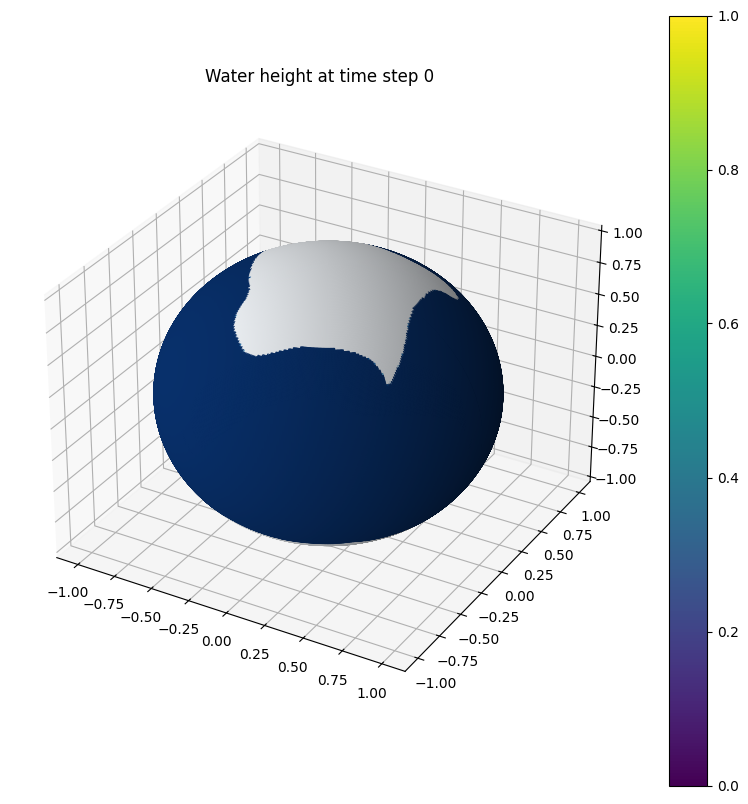

In [ ]:
idx = 0

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
colors = cm.Blues(water_height[0, idx, :, :])  # Map the data to the colormap
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colors, cmap=cmap, edgecolor='none')
plt.colorbar(surf)
plt.title("Water height at time step 0")
plt.show()

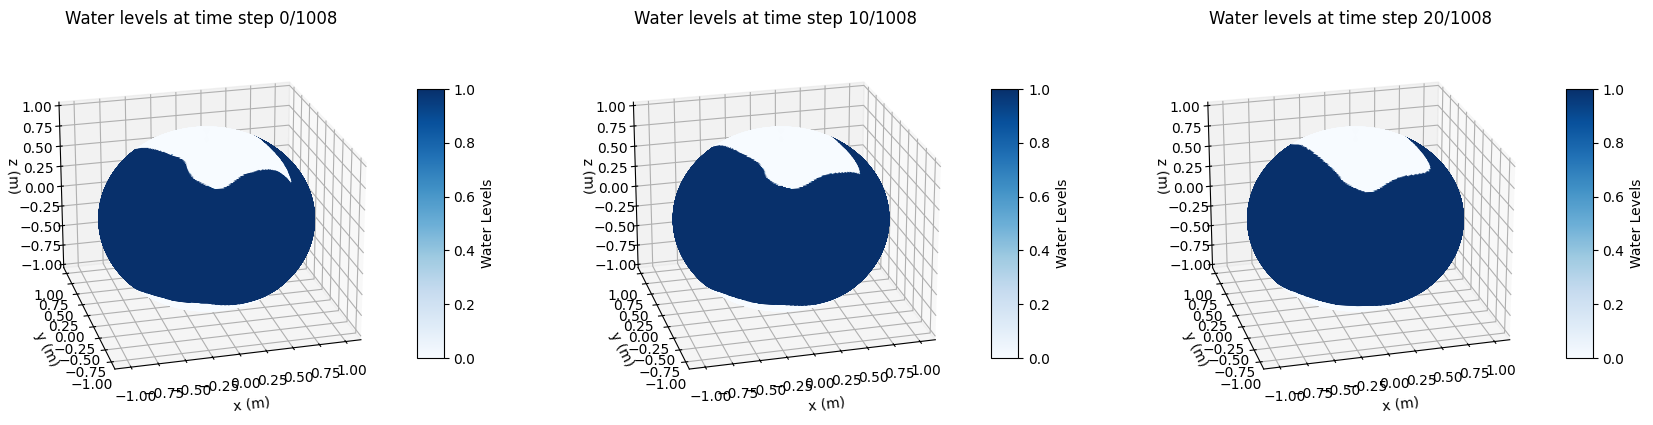

In [ ]:
idx = [0, 10, 20]  # Example: three subplots with different timesteps

n_plots = len(idx)

fig = plt.figure(figsize=(7 * n_plots, 7))  # Adjust width based on the number of subplots

# Loop through the indices and create subplots
for i, i_idx in enumerate(idx):
    # Normalize the data for the color mapping for the current idx
    colors = cm.Blues(water_height[0, i_idx, :, :])  # Map the data to the colormap

    # Add subplot (1 row, n_plots columns, plot number i+1)
    ax = fig.add_subplot(1, n_plots, i + 1, projection='3d')
    ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, antialiased=True, shade=False)

    # Add a colorbar
    mappable = cm.ScalarMappable(cmap='Blues')  # Create a mappable object
    mappable.set_array([])  # Necessary for the colorbar
    cbar = fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)  # Add the colorbar
    cbar.set_label('Water Levels')  # Label for the colorbar

    # Set titles and labels
    ax.set_title(f'Water levels at time step {i_idx}/{n}')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')
    ax.view_init(elev=22.5, azim=45+210)

plt.show()

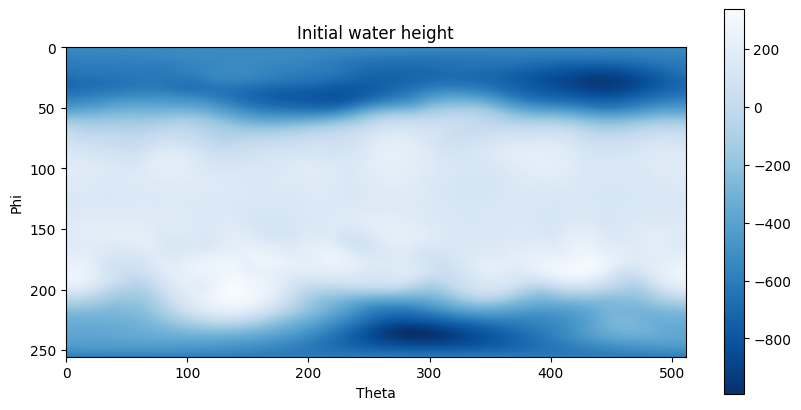

In [176]:
cmap = 'Blues_r'

# Plot initial water height
plt.figure(figsize=(10, 5))
plt.imshow(water_height[0, 100], cmap=cmap)
plt.colorbar()
plt.title("Initial water height")
plt.xlabel("Theta")
plt.ylabel("Phi")
plt.show()
